In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = '/home/siyun/ephemeral/data/'

gift = pd.read_csv(path + 'gift_data.csv')
# gift.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
# gift.head(2)

In [5]:
gift.category_3 = gift['category_3'].fillna(0)
# gift.head(2)

전체 데이터에 대해 먼저 라벨 인코딩을 진행

In [25]:
def unique_list(df) :
    # category_3가 nan일 경우 0으로 변환
    uni = df.isna().any()
    uni_filled = df.fillna(0).unique()

    non_zero_values = [x for x in uni_filled if x != 0]

    if uni:
        return [0] + non_zero_values
    else:
        return non_zero_values


new_df = gift.groupby('product_id').agg({
    'category_1' : lambda x : unique_list(x),
    'category_2' : lambda x : unique_list(x),
    'category_3' : lambda x : unique_list(x)}
).reset_index()


new_df.columns = ['product_id', 'new_cat_1', 'new_cat_2', 'new_cat_3']
new_df

,product_id,new_cat_1,new_cat_2,new_cat_3
0,100001296,"[생일선물, 취업선물, 퇴직선물]","[2030대여성, 4050대 여성, 환갑/칠순선물, 화장품]",[화장품]
1,100001366,[집들이선물],[푸드],[육류]
2,100002085,"[결혼기념일선물, 생일선물, 출산선물]","[부모님선물, 아내선물, 10대여성, 2030대여성, 4050대 여성, 환갑/칠순선...",[화장품]
3,100003341,[결혼기념일선물],[이벤트/파티용품],[]
4,100011730,[결혼기념일선물],[부모님선물],[화장품]
...,...,...,...,...
131070,9902026260,[집들이선물],[푸드],[디저트]
131071,9903134145,[집들이선물],[주방용품],[보관/밀폐용기]
131072,9903966146,[집들이선물],[푸드],[디저트]
131073,9908821827,[집들이선물],[반려동물],[강아지간식]


In [26]:
gift = pd.merge(gift.drop(['category_1','category_2','category_3'], axis=1).drop_duplicates(), new_df, on='product_id')
gift.head()

,product_id,product_name,brand,rating,num_review,price,image_url,product_url,new_cat_1,new_cat_2,new_cat_3
0,5776373699,브리타 막스트라 플러스 필터 3입,브리타 공식몰,4.9,9999,23200,https://shop-phinf.pstatic.net/20230131_57/167...,https://shopping.naver.com/gift/products/57763...,"[개업선물, 집들이선물]","[디지털_가전, 가전]",[주방가전]
1,4770915416,보르르 분유포트,보르르,4.9,9999,95000,https://shop-phinf.pstatic.net/20201214_92/160...,https://shopping.naver.com/gift/products/47709...,"[개업선물, 집들이선물]","[디지털_가전, 가전]",[주방가전]
2,419231351,▶▶브리츠 공식판매점/무상AS/우체국택배◀◀ BA-C1 SoundRoom 휴대용 블...,브리츠몰,4.8,9999,57000,https://shop-phinf.pstatic.net/20170925_179/li...,https://shopping.naver.com/gift/products/41923...,"[개업선물, 결혼기념일선물, 생일선물, 집들이선물]","[디지털_가전, 아내선물, 남편선물, 10대여성, 10대남성, 2030대여성, 20...","[디지털, 디지털/이미용가전, 생활가전]"
3,5776391312,브리타 정수기 마렐라 XL 3.5L 화이트+기본필터 1입,브리타 공식몰,4.9,9999,43900,https://shop-phinf.pstatic.net/20230131_217/16...,https://shopping.naver.com/gift/products/57763...,"[개업선물, 집들이선물]","[디지털_가전, 가전]",[주방가전]
4,260998910,전동 커피 그라인더 자동 원두 그라인더 커피기계 홈카페 가정용 그라인드 분쇄기 화이트,빈플러스,4.7,9999,36800,https://shop-phinf.pstatic.net/20230818_180/16...,https://shopping.naver.com/gift/products/26099...,"[개업선물, 집들이선물]","[디지털_가전, 가전]",[주방가전]


In [27]:
gift = gift.sort_values(by='product_id')

In [28]:
gift

,product_id,product_name,brand,rating,num_review,price,image_url,product_url,new_cat_1,new_cat_2,new_cat_3
158471,100001296,헬렌박 썬파우더 자외선차단 잡티커버 유분잡는 노세범 엠 파우더,헬렌박,4.6,820,28000,https://shop-phinf.pstatic.net/20231219_190/17...,https://shopping.naver.com/gift/products/10000...,"[생일선물, 취업선물, 퇴직선물]","[2030대여성, 4050대 여성, 환갑/칠순선물, 화장품]",[화장품]
84949,100001296,헬렌박 썬파우더 자외선차단 잡티커버 유분잡는 노세범 엠 파우더,헬렌박,4.6,820,28000,https://shop-phinf.pstatic.net/20231219_190/17...,https://shopping.naver.com/gift/products/10000...,"[생일선물, 취업선물, 퇴직선물]","[2030대여성, 4050대 여성, 환갑/칠순선물, 화장품]",[화장품]
298244,100001296,헬렌박 썬파우더 자외선차단 잡티커버 유분잡는 노세범 엠 파우더,헬렌박,4.6,820,28000,https://shop-phinf.pstatic.net/20231219_190/17...,https://shopping.naver.com/gift/products/10000...,"[생일선물, 취업선물, 퇴직선물]","[2030대여성, 4050대 여성, 환갑/칠순선물, 화장품]",[화장품]
147211,100001296,헬렌박 썬파우더 자외선차단 잡티커버 유분잡는 노세범 엠 파우더,헬렌박,4.6,820,28000,https://shop-phinf.pstatic.net/20231219_190/17...,https://shopping.naver.com/gift/products/10000...,"[생일선물, 취업선물, 퇴직선물]","[2030대여성, 4050대 여성, 환갑/칠순선물, 화장품]",[화장품]
285018,100001296,헬렌박 썬파우더 자외선차단 잡티커버 유분잡는 노세범 엠 파우더,헬렌박,4.6,820,28000,https://shop-phinf.pstatic.net/20231219_190/17...,https://shopping.naver.com/gift/products/10000...,"[생일선물, 취업선물, 퇴직선물]","[2030대여성, 4050대 여성, 환갑/칠순선물, 화장품]",[화장품]
...,...,...,...,...,...,...,...,...,...,...,...
230054,9902026260,마이노멀 저당 알룰로스 초코볼 2종 골라담기 (다크아몬드/밀크헤이즐넛),마이노멀,4.8,142,11900,https://shop-phinf.pstatic.net/20240111_156/17...,https://shopping.naver.com/gift/products/99020...,[집들이선물],[푸드],[디저트]
200859,9903134145,빈플러스 원두 커피 보관통 보관용기 유리 밀폐용기 S(분쇄 200g),빈플러스,4.7,301,6800,https://shop-phinf.pstatic.net/20240208_295/17...,https://shopping.naver.com/gift/products/99031...,[집들이선물],[주방용품],[보관/밀폐용기]
230944,9903966146,스위치온 벨드샤 카카오 72% 6g x 18개입 무설탕 다크 초콜릿 다이어트 저당 간식,리셋몰,4.9,112,16900,https://shop-phinf.pstatic.net/20240215_177/17...,https://shopping.naver.com/gift/products/99039...,[집들이선물],[푸드],[디저트]
239620,9908821827,하림펫푸드 라운지 웰컴 기프트팩,하림펫푸드,4.9,130,8000,https://shop-phinf.pstatic.net/20240201_268/17...,https://shopping.naver.com/gift/products/99088...,[집들이선물],[반려동물],[강아지간식]


In [29]:
gift.to_csv('/home/siyun/ephemeral/data/gift_comprehensive_need_duplicates.csv', index=False)

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

for col in ['new_cat_1', 'new_cat_2', 'new_cat_3']:
    gift[col] = gift[col].apply(lambda x: x if isinstance(x, list) else [])

# MultiLabelBinarizer 적용
## dataframe에 적용하는 것이 아닌 해당하는 부분만 가져온 후 적용하기
mlb = MultiLabelBinarizer()

mlb_cols = []

for col in ['new_cat_1', 'new_cat_2', 'new_cat_3']:
    # MultiLabelBinarizer 적용
    transformed = mlb.fit_transform(gift[col])
    # 새로운 DataFrame 생성
    transformed_df = pd.DataFrame(transformed, columns=[f"{col}_{c}" for c in mlb.classes_])
    # 변환된 컬럼 저장
    mlb_cols.append(transformed_df)

# 변환된 컬럼들을 원본 DataFrame에 병합
gift_encoding = pd.concat([gift.reset_index(drop=True)] + mlb_cols, axis=1)

# 원본 카테고리 컬럼 제거
gift_encoding.drop(['new_cat_1', 'new_cat_2', 'new_cat_3'], axis=1, inplace=True)

gift_encoding.head()


,product_id,product_name,brand,rating,num_review,price,image_url,product_url,new_cat_1_개업선물,new_cat_1_결혼기념일선물,...,new_cat_3_통조림/캔,new_cat_3_패션의류/잡화,new_cat_3_패션잡화,new_cat_3_펫리빙,new_cat_3_펫패션,new_cat_3_홈데코/패브릭,new_cat_3_홈프래그런스,new_cat_3_화장지,new_cat_3_화장품,new_cat_3_휴지통
0,5776373699,브리타 막스트라 플러스 필터 3입,브리타 공식몰,4.9,9999,23200,https://shop-phinf.pstatic.net/20230131_57/167...,https://shopping.naver.com/gift/products/57763...,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4770915416,보르르 분유포트,보르르,4.9,9999,95000,https://shop-phinf.pstatic.net/20201214_92/160...,https://shopping.naver.com/gift/products/47709...,1,0,...,0,0,0,0,0,0,0,0,0,0
2,419231351,▶▶브리츠 공식판매점/무상AS/우체국택배◀◀ BA-C1 SoundRoom 휴대용 블...,브리츠몰,4.8,9999,57000,https://shop-phinf.pstatic.net/20170925_179/li...,https://shopping.naver.com/gift/products/41923...,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5776391312,브리타 정수기 마렐라 XL 3.5L 화이트+기본필터 1입,브리타 공식몰,4.9,9999,43900,https://shop-phinf.pstatic.net/20230131_217/16...,https://shopping.naver.com/gift/products/57763...,1,0,...,0,0,0,0,0,0,0,0,0,0
4,260998910,전동 커피 그라인더 자동 원두 그라인더 커피기계 홈카페 가정용 그라인드 분쇄기 화이트,빈플러스,4.7,9999,36800,https://shop-phinf.pstatic.net/20230818_180/16...,https://shopping.naver.com/gift/products/26099...,1,0,...,0,0,0,0,0,0,0,0,0,0


여기에서 gender 구분하여 학습

In [7]:
gender = gift_encoding[gift_encoding[['new_cat_2_10대남성', 'new_cat_2_10대여성', 'new_cat_2_2030대 남성', 'new_cat_2_2030대여성', 'new_cat_2_4050대 남성', 'new_cat_2_4050대 여성']].any(axis=1)]

gender.head()

,product_id,product_name,brand,rating,num_review,price,image_url,product_url,new_cat_1_개업선물,new_cat_1_결혼기념일선물,...,new_cat_3_통조림/캔,new_cat_3_패션의류/잡화,new_cat_3_패션잡화,new_cat_3_펫리빙,new_cat_3_펫패션,new_cat_3_홈데코/패브릭,new_cat_3_홈프래그런스,new_cat_3_화장지,new_cat_3_화장품,new_cat_3_휴지통
2,419231351,▶▶브리츠 공식판매점/무상AS/우체국택배◀◀ BA-C1 SoundRoom 휴대용 블...,브리츠몰,4.8,9999,57000,https://shop-phinf.pstatic.net/20170925_179/li...,https://shopping.naver.com/gift/products/41923...,1,1,...,0,0,0,0,0,0,0,0,0,0
8,5471776094,삼성전자 노트북 플러스2 NT550XDA-K14A 윈도우11 사무 인강용 NVME ...,삼성쇼핑몰 스피드썬,4.8,9999,499000,https://shop-phinf.pstatic.net/20221011_243/16...,https://shopping.naver.com/gift/products/54717...,1,1,...,0,0,0,0,0,0,0,0,0,0
9,639002598,오아 아이브릭 휴대용 미니 무선 블루투스 스피커,오아스토어,4.8,9999,24800,https://shop-phinf.pstatic.net/20200212_105/15...,https://shopping.naver.com/gift/products/63900...,1,1,...,0,0,0,0,0,0,0,0,0,0
10,7947731221,카누 바리스타 캡슐커피머신 브리즈 (웰컴캡슐&보관함 증정),카누 공식 브랜드스토어,4.9,9999,119000,https://shop-phinf.pstatic.net/20240214_51/170...,https://shopping.naver.com/gift/products/79477...,1,0,...,0,0,0,0,0,0,0,0,0,0
18,5281749541,[N 내일 도착🚀 최다판매/최대리뷰] 삼성공식파트너 JBL GO3 블루투스스피커 무...,삼성파트너 케이원에이브이,4.9,7480,40300,https://shop-phinf.pstatic.net/20230809_204/16...,https://shopping.naver.com/gift/products/52817...,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
gender_encoding = gender.drop_duplicates(subset='product_id')
# gender_encoding

gender_encoding에서 column을 받아서 target, feature 분리

추후 전체 데이터에서도 동일작업 반복

In [9]:
lst = list(gender_encoding.columns)

features = lst.copy()

# 새로운 feature 리스트 생성
removes = ['product_id', 'product_name', 'brand', 'image_url', 'product_url','new_cat_2_10대남성', 'new_cat_2_10대여성', 'new_cat_2_2030대 남성','new_cat_2_2030대여성', 'new_cat_2_4050대 남성', 'new_cat_2_4050대 여성']
for remove in removes : 
    features.remove(remove)

In [46]:
features

['rating',
 'num_review',
 'price',
 'new_cat_1_개업선물',
 'new_cat_1_결혼기념일선물',
 'new_cat_1_새차선물',
 'new_cat_1_생일선물',
 'new_cat_1_집들이선물',
 'new_cat_1_출산선물',
 'new_cat_1_취업선물',
 'new_cat_1_퇴직선물',
 'new_cat_1_합격기원선물',
 'new_cat_2_e쿠폰',
 'new_cat_2_가전',
 'new_cat_2_과일',
 'new_cat_2_꽃',
 'new_cat_2_남편선물',
 'new_cat_2_데스크테리어',
 'new_cat_2_디지털',
 'new_cat_2_디지털_가전',
 'new_cat_2_리빙/인테리어',
 'new_cat_2_문구용품',
 'new_cat_2_반려동물',
 'new_cat_2_부모님선물',
 'new_cat_2_생활용품',
 'new_cat_2_세차용품',
 'new_cat_2_셀프촬영',
 'new_cat_2_손편지',
 'new_cat_2_식물',
 'new_cat_2_식품',
 'new_cat_2_신생아선물',
 'new_cat_2_아내선물',
 'new_cat_2_영양제',
 'new_cat_2_욕실용품',
 'new_cat_2_이벤트/파티용품',
 'new_cat_2_인테리어',
 'new_cat_2_임산부선물',
 'new_cat_2_주방용품',
 'new_cat_2_청소용품',
 'new_cat_2_케이크',
 'new_cat_2_쿠션_방석',
 'new_cat_2_키용품',
 'new_cat_2_파티용품',
 'new_cat_2_편의용품',
 'new_cat_2_푸드',
 'new_cat_2_향초_디퓨저',
 'new_cat_2_홈프레그런스',
 'new_cat_2_화장품',
 'new_cat_2_환갑/칠순선물',
 'new_cat_3_e쿠폰',
 'new_cat_3_가구',
 'new_cat_3_가전',
 'new_cat_3_강아지간식',
 'new_cat_

In [10]:
features

targets = ['new_cat_2_10대남성', 'new_cat_2_10대여성', 'new_cat_2_2030대 남성',
           'new_cat_2_2030대여성', 'new_cat_2_4050대 남성', 'new_cat_2_4050대 여성']


In [11]:
# 각 아이템이 해당 연령,성별 그룹에 속할 확률을 각각 구해야함.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X = gender_encoding[features]  
y = gender_encoding[targets].idxmax(axis=1)  # 대상 변수: 각 행에서 최대값을 가진 칼럼의 이름

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# 로지스틱을 통한 다중분류
model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', max_iter=1000))

# 모델 학습
model.fit(X_train, y_train)

# 예측 및 확률 계산
y_pred = model.predict(X_test)  # 예측된 클래스
y_prob = model.predict_proba(X_test)  # 각 클래스에 속할 확률



gender 안에서 나머지 train에 사용되었던 데이터에도 이를 적용하여 최종적인 inference

In [12]:
y_pred_full = model.predict(X)  # 전체 데이터에 대한 예측된 클래스
y_prob_full = model.predict_proba(X)  # 전체 데이터에 대한 각 클래스에 속할 확률

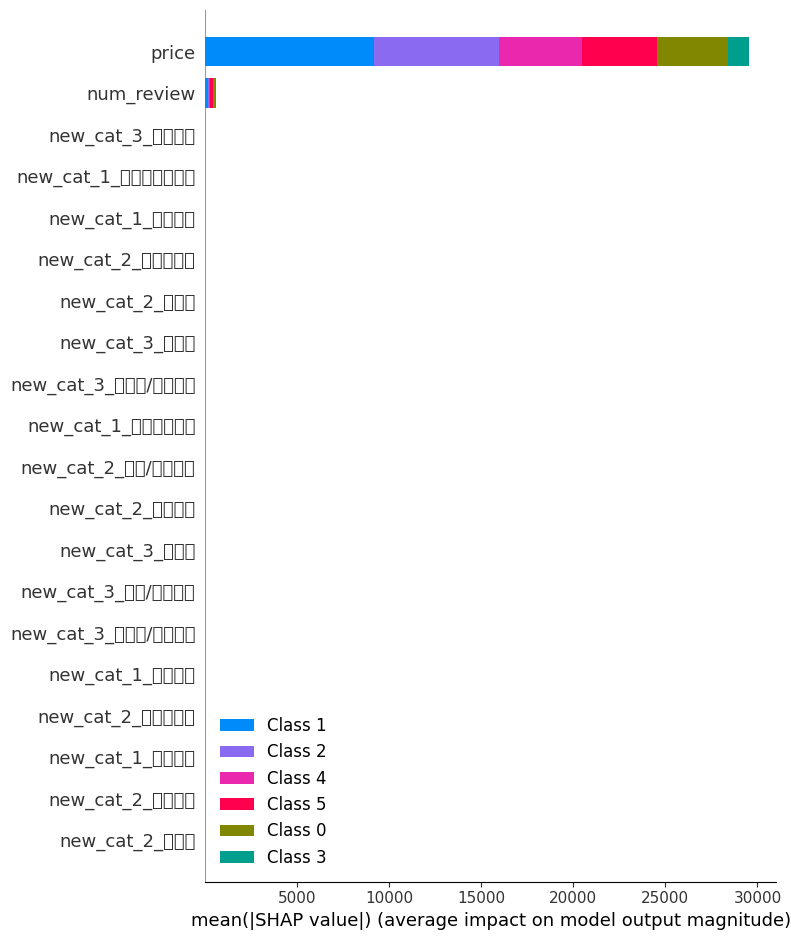

In [49]:
import matplotlib.pyplot as plt
import shap

# SHAP Explainer 생성
explainer = shap.LinearExplainer(model.named_steps['logisticregression'], X_train, feature_dependence="independent")

# SHAP 값 계산
shap_values = explainer.shap_values(X_test)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, feature_names=features)

최종적으로 gender에 해당하는 product_id에 대해서 추론이 진행됨

In [13]:
# model.classes_ 리스트에서 해당 클래스의 인덱스 반환
target_classes = model.classes_

# 매핑에 대해서도 인풋으로 연령/성별이 들어오면 
## 연령 -> def age_cat등을 통해서 변환하고
## 성별 -> m,f로 반환
target_mapping = {
    'new_cat_2_10대남성': '10_m',
    'new_cat_2_10대여성': '10_f',
    'new_cat_2_2030대 남성': '2030_m',
    'new_cat_2_2030대여성': '2030_f',
    'new_cat_2_4050대 남성': '4050_m',
    'new_cat_2_4050대 여성': '4050_f'
}

for original_class, new_class in target_mapping.items():
    class_index = list(target_classes).index(original_class)
    # 해당 인덱스를 사용하여 y_prob_full에서 해당 확률을 선택하고, 새 컬럼으로 추가합니다.
    gender_encoding[new_class] = y_prob_full[:, class_index]

In [ ]:
gender_encoding

전체에 대한 inference

In [14]:
used_product_ids = gender_encoding['product_id']

gender에 사용되었던 부분을 제외

In [ ]:
remaining_gift = gift_encoding[~gift_encoding['product_id'].isin(used_product_ids)]
remaining_gift = remaining_gift.drop_duplicates(subset='product_id')
remaining_gift

feature, target 설정

In [16]:
X_remaining = remaining_gift[features]  # 피처 선택
y_remaining = remaining_gift[targets].idxmax(axis=1)  # 대상 변수: 각 행에서 최대값을 가진 칼럼의 이름


In [17]:
y_pred_remaining = model.predict(X_remaining)  # 예측된 클래스
y_prob_remaining = model.predict_proba(X_remaining)  # 각 클래스에 속할 확률


In [18]:
for original_class, new_class in target_mapping.items():
    class_index = list(target_classes).index(original_class)
    remaining_gift[new_class] = y_prob_remaining[:, class_index]

In [62]:
remaining_gift

,product_id,product_name,brand,rating,num_review,price,image_url,product_url,new_cat_1_개업선물,new_cat_1_결혼기념일선물,...,new_cat_3_홈프래그런스,new_cat_3_화장지,new_cat_3_화장품,new_cat_3_휴지통,10_m,10_f,2030_m,2030_f,4050_m,4050_f
0,5776373699,브리타 막스트라 플러스 필터 3입,브리타 공식몰,4.9,9999,23200,https://shop-phinf.pstatic.net/20230131_57/167...,https://shopping.naver.com/gift/products/57763...,1,0,...,0,0,0,0,0.014923,0.023861,0.118242,0.813914,0.000460,0.028601
1,4770915416,보르르 분유포트,보르르,4.9,9999,95000,https://shop-phinf.pstatic.net/20201214_92/160...,https://shopping.naver.com/gift/products/47709...,1,0,...,0,0,0,0,0.015764,0.021027,0.130155,0.802307,0.000432,0.030315
3,5776391312,브리타 정수기 마렐라 XL 3.5L 화이트+기본필터 1입,브리타 공식몰,4.9,9999,43900,https://shop-phinf.pstatic.net/20230131_217/16...,https://shopping.naver.com/gift/products/57763...,1,0,...,0,0,0,0,0.015164,0.023011,0.121583,0.810701,0.000452,0.029090
4,260998910,전동 커피 그라인더 자동 원두 그라인더 커피기계 홈카페 가정용 그라인드 분쇄기 화이트,빈플러스,4.7,9999,36800,https://shop-phinf.pstatic.net/20230818_180/16...,https://shopping.naver.com/gift/products/26099...,1,0,...,0,0,0,0,0.005485,0.012650,0.061486,0.886985,0.000307,0.033086
5,5399969954,Niimbot D11 네임스티커 라벨프린터 님봇라벨기,포토비,4.9,9999,39000,https://shop-phinf.pstatic.net/20210216_208/16...,https://shopping.naver.com/gift/products/53999...,1,0,...,0,0,0,0,0.000190,0.000566,0.997548,0.001296,0.000159,0.000240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320587,5938423423,[본죽] 1만원권,기프트팝,4.9,151,10000,https://shop-phinf.pstatic.net/20240216_44/170...,https://shopping.naver.com/gift/products/59384...,0,0,...,0,0,0,0,0.711321,0.215104,0.063386,0.004011,0.005728,0.000450
320597,5201187942,[기프티쇼] kt통합상품권 1만원권,Giftishow,5.0,138,10000,https://shop-phinf.pstatic.net/20201105_47/160...,https://shopping.naver.com/gift/products/52011...,0,0,...,0,0,0,0,0.750577,0.185761,0.056511,0.002445,0.004437,0.000268
320603,4392874134,"[기프티쇼] 지니 음악감상 50회(30일,상품권)",Giftishow,4.9,135,880,https://shop-phinf.pstatic.net/20201013_246/16...,https://shopping.naver.com/gift/products/43928...,0,0,...,0,0,0,0,0.707865,0.219028,0.062831,0.004032,0.005796,0.000449
320610,5201192872,[기프티쇼] kt통합상품권 5천원권,Giftishow,4.8,123,5000,https://shop-phinf.pstatic.net/20201105_268/16...,https://shopping.naver.com/gift/products/52011...,0,0,...,0,0,0,0,0.665905,0.249128,0.070264,0.006556,0.007398,0.000750


In [19]:
total_gift = pd.concat([remaining_gift,gender_encoding], axis=0)

In [20]:
total_gift = total_gift.sort_values(by='product_id')

In [ ]:
total_gift

In [22]:
total_gift.to_csv('/home/siyun/ephemeral/data/gender_inference.csv', index=False)